<a href="https://colab.research.google.com/github/kingattai/ml-lime-shap-disease-prediction/blob/main/The_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=898b3f51a7e37adba9a721a97cfd217fdac8ddbbd1ec995e1eeecb779464e91d
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
import pandas as pd
from google.colab import drive
import numpy as np
import lime.lime_tabular
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NFRF ML/FD6D.csv')
df

,Unnamed: 0,ABDPN,BITAIM,BLDYURN,CTRH,CHSIND,CHSPN,CHLNRIG,CNST,CGHDRY,...,SPPBPN,URNFQC,VMT,WHZ,MAL,ENFVR,HVAD,UTI,RTI,TB
0,0,4,4,1,3,3,4,4,3,2,...,2,1,4,4,1,1,0,1,1,0
1,1,2,2,1,3,1,1,2,1,2,...,1,1,2,1,1,0,0,0,1,0
2,2,1,3,1,2,1,2,5,3,1,...,1,1,1,1,0,1,0,0,0,0
3,3,3,3,2,3,1,3,1,1,2,...,4,4,4,1,1,0,1,1,1,0
4,4,3,1,4,1,3,1,1,1,1,...,4,3,3,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909,3909,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3910,3910,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3911,3911,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3912,3912,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0,0,0


In [ ]:
#Using DataFrame.drop() method.
df2=df.drop(df.columns[0], axis=1)
df2

,ABDPN,BITAIM,BLDYURN,CTRH,CHSIND,CHSPN,CHLNRIG,CNST,CGHDRY,DIFBRT,...,SPPBPN,URNFQC,VMT,WHZ,MAL,ENFVR,HVAD,UTI,RTI,TB
0,4,4,1,3,3,4,4,3,2,3,...,2,1,4,4,1,1,0,1,1,0
1,2,2,1,3,1,1,2,1,2,1,...,1,1,2,1,1,0,0,0,1,0
2,1,3,1,2,1,2,5,3,1,1,...,1,1,1,1,0,1,0,0,0,0
3,3,3,2,3,1,3,1,1,2,1,...,4,4,4,1,1,0,1,1,1,0
4,3,1,4,1,3,1,1,1,1,1,...,4,3,3,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3910,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3911,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3912,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0,0,0


In [ ]:
X = df2.iloc[:, :32].values
X

array([[4, 4, 1, ..., 1, 4, 4],
       [2, 2, 1, ..., 1, 2, 1],
       [1, 3, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
Y = df2.iloc[:, 32:].values
Y

array([[1, 1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
# Function to evaluate classifiers
def evaluate(y_true, y_pred):
    print("Performance Evaluation:")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    auc_score = roc_auc_score(y_true, y_pred, average='macro')
    print("AUC-ROC:", auc_score)
    #print("\nConfusion Matrix:")
    #print(confusion_matrix(y_true, y_pred))

In [ ]:
# Split the dataset into training and testing sets
#X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Define classifiers
#svm = SVC()
rf = RandomForestClassifier()
#xgb = XGBClassifier()

In [ ]:
# Create multi-output classifiers
#multi_svm = MultiOutputClassifier(svm)
multi_rf = MultiOutputClassifier(rf)
#multi_xgb = MultiOutputClassifier(xgb)

In [ ]:
# Define parameter grids for grid search
#param_grid_svm = {'estimator__C': [0.1, 1, 10], 'estimator__gamma': [0.1, 1, 10]}
param_grid_rf = {'estimator__n_estimators': [100, 200, 300], 'estimator__max_depth': [None, 10, 20]}
#param_grid_xgb = {'estimator__n_estimators': [100, 200, 300], 'estimator__max_depth': [3, 5, 7]}

In [ ]:
# Perform grid search for each classifier
#svm_grid = GridSearchCV(multi_svm, param_grid_svm, cv=3, scoring='accuracy')
rf_grid = GridSearchCV(multi_rf, param_grid_rf, cv=3, scoring='accuracy')
#xgb_grid = GridSearchCV(multi_xgb, param_grid_xgb, cv=3, scoring='accuracy')

In [ ]:
# Fit the classifiers to the baseline dataset
#svm_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
#xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=RandomForestClassifier()),
             param_grid={'estimator__max_depth': [None, 10, 20],
                         'estimator__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Make predictions on the baseline dataset
#svm_pred = svm_grid.best_estimator_.predict(X_test)
rf_pred = rf_grid.best_estimator_.predict(X_test)
#xgb_pred = xgb_grid.best_estimator_.predict(X_test)


In [ ]:
# Print evaluation metrics for the baseline dataset
print("Performance Evaluation for Baseline Dataset:")
#print("Support Vector Machine:")
#evaluate(y_test, svm_pred)
print("\nRandom Forest:")
evaluate(y_test, rf_pred)
#print("\nExtreme Gradient Boosting:")
#evaluate(y_test, xgb_pred)

Performance Evaluation for Baseline Dataset:

Random Forest:
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       536
           1       0.69      0.53      0.60       230
           2       0.74      0.38      0.50        98
           3       0.80      0.65      0.72       175
           4       0.76      0.69      0.72       229
           5       0.79      0.50      0.61        82

   micro avg       0.79      0.71      0.75      1350
   macro avg       0.77      0.61      0.67      1350
weighted avg       0.79      0.71      0.74      1350
 samples avg       0.72      0.68      0.67      1350

Accuracy: 0.48531289910600256
AUC-ROC: 0.7513983374808904


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Make predictions on the training data
rf_train_pred = rf_grid.best_estimator_.predict(X_train)

In [ ]:
# Print evaluation metrics for the training dataset
print("\nRandom Forest - Training Data Evaluation:")
evaluate(y_train, rf_train_pred)


Random Forest - Training Data Evaluation:
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2183
           1       1.00      0.98      0.99       927
           2       1.00      0.97      0.98       326
           3       1.00      0.98      0.99       732
           4       1.00      0.99      1.00       865
           5       1.00      1.00      1.00       299

   micro avg       1.00      0.99      0.99      5332
   macro avg       1.00      0.99      0.99      5332
weighted avg       1.00      0.99      0.99      5332
 samples avg       0.88      0.88      0.88      5332

Accuracy: 0.980836793356755
AUC-ROC: 0.99099327722812


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""
<ipython-input-19-24d51836ed0e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


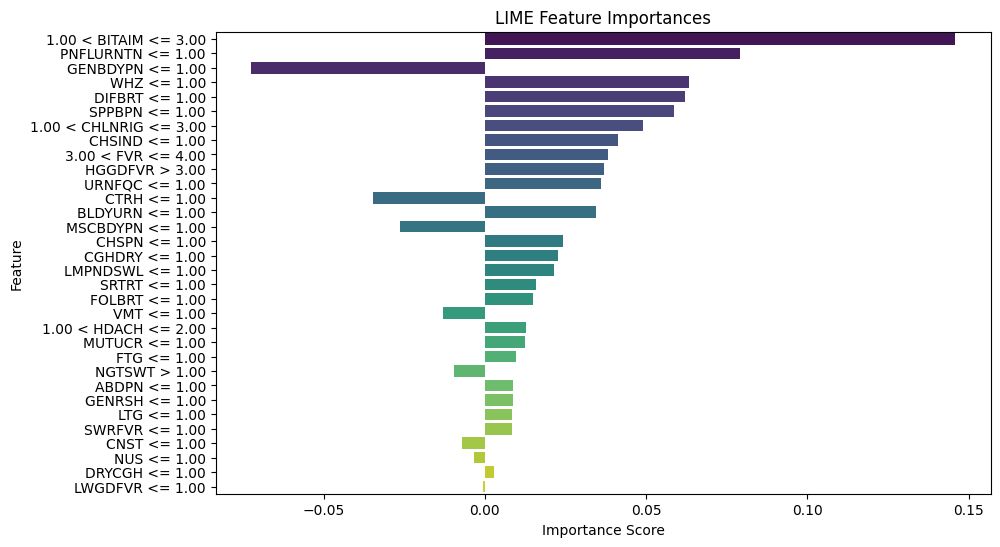

In [ ]:
# LIME explanation plot
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=df2.columns[:32],
    class_names=['MAL', 'ENFVR', 'HVAD', 'UTI', 'RTI', 'TB'],
    discretize_continuous=True
)

i = np.random.randint(0, X_test.shape[0])

# Create a wrapper function for predict_proba to handle multi-output
def predict_proba_wrapper(x):
    predictions = rf_grid.best_estimator_.predict_proba(x)
    # predictions is a list of arrays, so we need to combine them into a single 2D array
    return np.column_stack(predictions)

exp = explainer.explain_instance(X_test[i], predict_proba_wrapper, num_features=32)

# Extract feature importances for the selected instance
importance_df = pd.DataFrame(exp.as_list(), columns=['Feature', 'Importance'])

# Plot LIME explanation
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('LIME Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()